100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]


┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Mixture{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.PoissonArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:231
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:231
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Mixture{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.PoissonArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:233
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:233


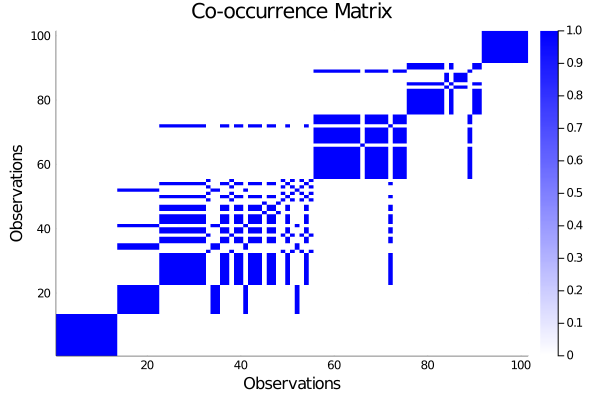

In [15]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(0)

data_covariance = Matrix{Float64}(0.01I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
poisson_arrival = Ntl.Models.PoissonArrivals(8,1)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, poisson_arrival)

mixture_model = Ntl.Models.Mixture(ntl_cluster_parameters, data_parameters)
mixture = Ntl.Generate.generate(mixture_model, n=101)
data = Matrix(transpose(mixture[:, 2:end]))
training_data = data[:, 1:100]
test_datum = vec(data[:, 100])
true_clustering = mixture[:, 1]
Ntl.Plot.plot_assignments(true_clustering)
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

100.0%┣█████████████████████████████████████┫ 1000/1000 [00:20<00:00, 49.9 it/s]
100.0%┣███████████████████████████████████┫ 1000/1000 [00:01<00:00, 1893.1 it/s]


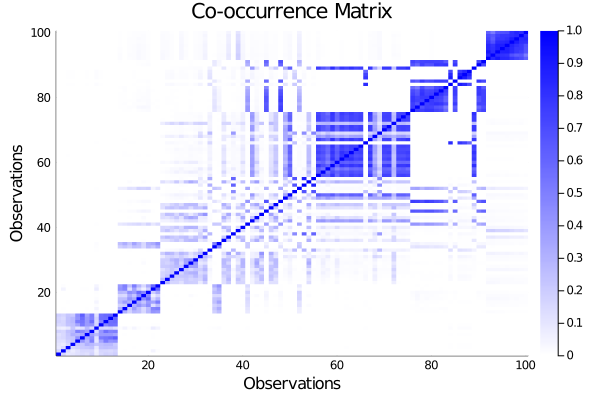

In [16]:
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, poisson_arrival)
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000)
(instances, log_likelihoods) = Ntl.Fitter.fit(training_data, mixture_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(instances)